In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

import sys
sys.path.insert(0, '/Users/mariavincenzi/PhD/pycoco_2/')
#import Generate_grid_INPUT as grid_input

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
COCO_PATH=os.environ['COCO_PATH']
pycoco_path = "C:/Users/Filip/Desktop/ASTRprojekt/template2/Outputs/"
TMPL_path = '/Users/mariavincenzi/PhD/pycoco_2/SNANA_GRIDs/Templates/'
#final_table = pd.read_csv('/Users/mariavincenzi/PhD/pycoco_2/data/info/FINAL_info.dat')#[:-3]


In [3]:
final_table.Name.values

NameError: name 'final_table' is not defined

In [4]:
peak_dicts = dict(zip(final_table.Name.values, np.array(final_table['mjd Lbol peak'].values, dtype=float)))

NameError: name 'final_table' is not defined

In [5]:
SNe_lista = final_table.Name.values[final_table.SIMS.values]
type_lista = final_table.Type.values[final_table.SIMS.values]



NameError: name 'final_table' is not defined

In [6]:
len(SNe_lista)

NameError: name 'SNe_lista' is not defined

In [7]:
[i for i in zip(SNe_lista, type_lista)]

NameError: name 'SNe_lista' is not defined

In [4]:
using_hostNOTcorrected = False

In [9]:
peak_dicts = {}
peak_dicts['SN2017bgu']=57817

In [10]:
extend_with_sudo_spec = False
phase_extended = np.arange(-25, 100, 2)#grid_input.Phase_grid #
wls_fake = np.arange(1605., 11005., 5)
flux_fake = 10**-12

for sn in ['SN2017bgu']:#SNe_lista[:]:
    print (sn)
    header = """### %s.SED ###
### Mangled with pycoco, corrected for Host Extinction and MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 
    header_noHostCorr = """### %s.SED ###
### Mangled with pycoco, NOT corrected for Host Extinction, corrected for MW
### %i-%i-%i, M. Vincenzi
"""%(sn, time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday) 

    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
        
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    if len(np.unique(mjds))!=len(mjds):
        repeat_mjd = np.unique(mjds[(np.array([list(mjds).count(m) for m in mjds])==2)])[0]
        mjds[(np.array([list(mjds).count(m) for m in mjds])==2)] = np.array([repeat_mjd, repeat_mjd+0.01])
    phase = mjds-peak
    
    if using_hostNOTcorrected:
        fout = open(TMPL_path+'/PyCoCo_noHostCorr/pycoco_%s_noHostCorr.SED'%sn, 'w+')
        fout.write(header_noHostCorr)
    else:
        fout = open(COCO_PATH+'/Templates_HostCorrected/pycoco_%s.SED'%sn, 'w+')
        fout.write(header)

    
    if not extend_with_sudo_spec:
        phase_extended = phase
    
    for ph in phase_extended[phase_extended<min(phase)]:
        for w in wls_fake:
            fout.write('%.3f\t%.2f\t%.2E\n'%(ph,w,flux_fake))
    for ph,s in zip(phase, final_spectra):
        spec = pd.read_csv(final_spectra_path+s, delimiter='\t')
        resample_flux = np.interp(wls_fake, spec['#wls'].values, spec['flux'].values,
             right=np.nan, left=np.nan)
        resample_fluxerr = np.interp(wls_fake, spec['#wls'].values, spec['fluxerr'].values,
             right=np.nan, left=np.nan)
        resample_spec = pd.DataFrame.from_dict(zip(spec.columns,[wls_fake, resample_flux, resample_fluxerr])).dropna()
        
        tempDict = {}
        tempDict['#wls'] = resample_spec[1][0]
        tempDict['flux'] = resample_spec[1][1]
        tempDict['fluxerr'] = resample_spec[1][2]
        resample_spec = pd.DataFrame(tempDict)
            
            
        if max(resample_spec['#wls']<11000):
            wls_ext = wls_fake[wls_fake>max(resample_spec['#wls'])]
            flux_ext = np.ones(len(wls_ext))*flux_fake
            flux_err_ext = np.ones(len(wls_ext))*flux_fake
            extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
                                                                  [wls_ext, flux_ext, flux_err_ext])), ignore_index=True)
        else:
            extend_spec = resample_spec.copy()
        if min(resample_spec['#wls']>min(wls_fake)): 
            print (sn, 'MIN', min(resample_spec['#wls']))
        extend_spec['phase']=ph
        for p,w,f in extend_spec[['phase', '#wls','flux']].values:
            fout.write('%.3f %.2f %.2E\n'%(p,w,f))
    for ph in phase_extended[phase_extended>max(phase)]:
        for w in wls_fake:
            fout.write('%.3f %.2f %.2E\n'%(ph,w,flux_fake))

    fout.close()

SN2017bgu


C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extend_spec = resample_spec.append(pd.DataFrame.from_dict(zip(resample_spec.columns,
C:\Users\Filip\AppData\Local\Temp/ipykernel_5988/858270682.py:64: FutureWarning: The frame.append method is deprecated and will be removed fro

In [16]:
name2typ = dict(zip(final_table.Name.values,final_table.Type.values))
name2typ = dict(zip(final_table.Name.values,final_table.Type.values))

NameError: name 'final_table' is not defined

In [17]:
final_table.sort_index(by=['Type', 'M_B']).Name.values

NameError: name 'final_table' is not defined

In [18]:
for sn in final_table.sort_index(by=['Type', 'M_B']).Name.values:
    if using_hostNOTcorrected:
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/HostNotCorr/'%(sn)
    else: 
        final_spectra_path = pycoco_path+'%s/FINAL_spectra_2dim/'%(sn)
    final_spectra = [f for f in os.listdir(final_spectra_path) \
                         if os.path.isfile(os.path.join(final_spectra_path, f))&('.txt' in f)]
    peak = peak_dicts[sn]
    
    mjds = np.array([f[:8] for f in final_spectra], dtype=float)
    phase = mjds-peak
    #print (sn, peak, min(phase), max(phase))
    print ('%0-10s  '%sn,'%0-6s'%name2typ[sn], '  %0-3i'%min(phase) , '  %0-3i'%max(phase))

NameError: name 'final_table' is not defined

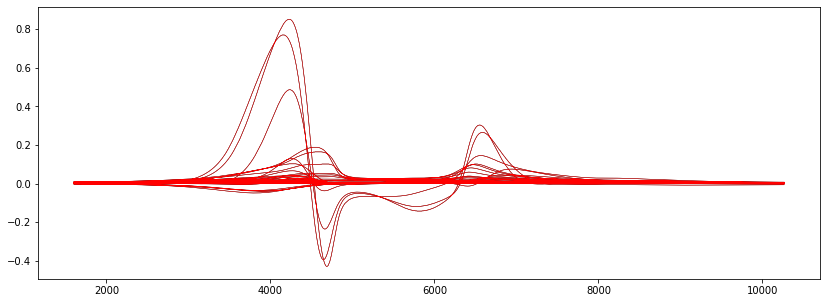

In [20]:
snana_templ = np.genfromtxt(COCO_PATH+'/Templates_HostCorrected/pycoco_%s.SED'%'SN2020oi')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='k',lw=0.5)


snana_templ = np.genfromtxt(COCO_PATH+'/Templates_HostCorrected/pycoco_%s.SED'%'SN2020oi')
figure=plt.figure(1, figsize=(14,5))
plt.plot(snana_templ[:,1], snana_templ[:,2], color='r',lw=0.5)

